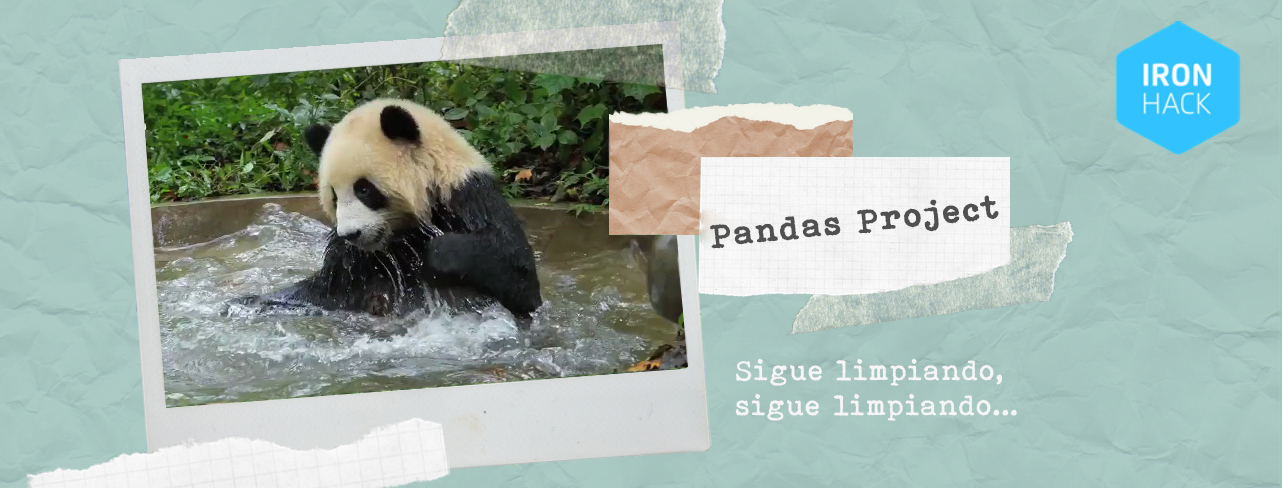

In [1]:
import pandas as pd
import src.limpieza_texto as lt

In [2]:
data = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Empezaremos a cercenar la información del dataset sacando fuera todas las columnas que no vamos a usar y a la que no les vamos a prestar atención.

In [4]:
data.drop('Area', axis = 1, inplace = True)
data.drop('Name', axis = 1, inplace = True)
data.drop('Sex ', axis = 1, inplace = True)
data.drop('Age', axis = 1, inplace = True)
data.drop('Injury', axis = 1, inplace = True)
data.drop('href formula', axis = 1, inplace = True)
data.drop('href', axis = 1, inplace = True)
data.drop('Case Number.1', axis = 1, inplace = True)
data.drop('Case Number.2', axis = 1, inplace = True)
data.drop('original order', axis = 1, inplace = True)
data.drop('Unnamed: 22', axis = 1, inplace = True)
data.drop('Unnamed: 23', axis = 1, inplace = True)
data.drop('Time', axis = 1, inplace = True)
data.drop('Country', axis = 1, inplace = True)
data.drop('Activity', axis = 1, inplace = True)
data.drop('Location', axis = 1, inplace = True)
data.drop('Case Number', axis = 1, inplace = True)
data.drop('Investigator or Source', axis = 1, inplace = True)
data.drop('pdf', axis = 1, inplace = True)


data.head()

,Date,Year,Type,Fatal (Y/N),Species
0,25-Jun-2018,2018.0,Boating,N,White shark
1,18-Jun-2018,2018.0,Unprovoked,N,NaN
2,09-Jun-2018,2018.0,Invalid,N,NaN
3,08-Jun-2018,2018.0,Unprovoked,N,2 m shark
4,04-Jun-2018,2018.0,Provoked,N,"Tiger shark, 3m"


### Una vez que nos hemos quedado con las columnas a trabajar, eliminaremos las filas del df en las que todos los valores sean NaN.

In [5]:
data.dropna(inplace = True, how = 'all')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6302 non-null   object 
 1   Year         6300 non-null   float64
 2   Type         6298 non-null   object 
 3   Fatal (Y/N)  5763 non-null   object 
 4   Species      3464 non-null   object 
dtypes: float64(1), object(4)
memory usage: 295.4+ KB


### Como la columna de Date es la que coincide en numero de filas con el df y no tiene ningún NaN, trabajaremos las columnas a crear desde esa.

In [14]:
data['Date'] = data['Date'].apply(lt.year_sure)

In [17]:
data['Date'] = data['Date'].apply(lt.limpiar_fecha)

In [20]:
data['Date'] = data['Date'].apply(lt.meses_to_num)

In [62]:
data['Date'] = data['Date'].apply(lt.quitar_suciedad)

In [33]:
data.head(5)

,Date,Year,Type,Fatal (Y/N),Species
0,25/06/2018,2018.0,Boating,N,White shark
1,18/06/2018,2018.0,Unprovoked,N,NaN
2,09/06/2018,2018.0,Invalid,N,NaN
3,08/06/2018,2018.0,Unprovoked,N,2 m shark
4,04/06/2018,2018.0,Provoked,N,"Tiger shark, 3m"


In [64]:
data.tail(5)

,Date,Year,Type,Fatal (Y/N),Species,Dayweek
6297,1903,0.0,Unprovoked,Y,NaN,Thursday
6298,1903,0.0,Unprovoked,Y,NaN,Thursday
6299,1900/1905,0.0,Unprovoked,Y,NaN,None
6300,1883/1889,0.0,Unprovoked,Y,NaN,None
6301,1845/1853,0.0,Unprovoked,Y,NaN,None


### Hemos liapiado y dado formato lo máximo posible a la columnna de Date u A partir de ella vamos a crear la de Day_week, vamos a modificar la de Year y a crear Decade a partir de Year

In [40]:
data['Dayweek'] = data['Date'].apply(lt.dayweek_clean)

In [47]:
data.tail(30)

,Date,Year,Type,Fatal (Y/N),Species,Dayweek
6272,None,0.0,Sea Disaster,N,NaN,None
6273,1905,0.0,Unprovoked,Y,NaN,Sunday
6274,1938,0.0,Boat,N,White shark,Saturday
6275,None,0.0,Unprovoked,N,NaN,None
6276,1930,0.0,Unprovoked,Y,12' tiger shark,Wednesday
6277,1927,0.0,Unprovoked,UNKNOWN,NaN,Saturday
6278,1939,0.0,Unprovoked,Y,NaN,Sunday
6279,None,0.0,Unprovoked,N,NaN,None
6280,None,0.0,Unprovoked,N,NaN,None
6281,None,0.0,Unprovoked,Y,NaN,None


In [65]:
data['Year'] = data['Date'].apply(lt.columna_year)

In [67]:
data.head(5)

,Date,Year,Type,Fatal (Y/N),Species,Dayweek
0,25/06/2018,2018,Boating,N,White shark,Monday
1,18/06/2018,2018,Unprovoked,N,NaN,Monday
2,09/06/2018,2018,Invalid,N,NaN,Saturday
3,08/06/2018,2018,Unprovoked,N,2 m shark,Friday
4,04/06/2018,2018,Provoked,N,"Tiger shark, 3m",Monday


In [69]:
data.tail(5)

,Date,Year,Type,Fatal (Y/N),Species,Dayweek
6297,1903,1903,Unprovoked,Y,NaN,Thursday
6298,1903,1903,Unprovoked,Y,NaN,Thursday
6299,1900/1905,1905,Unprovoked,Y,NaN,None
6300,1883/1889,1889,Unprovoked,Y,NaN,None
6301,1845/1853,1853,Unprovoked,Y,NaN,None


In [99]:
data['Year'] = data['Year'].apply(lt.clean_year)

In [100]:
data['Year'] = data['Year'].apply(lt.clean_year_suciedad)

In [104]:
data.Year.unique()

array(['2018', '2017', None, '2016', '2015', '2014', '2013', '2012',
       '2011', '2008', '2010', '2009', '2006', '2007', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1984', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964',
       '1954', '1963', '1962', '1961', '1960', '1959', '1764', '1958',
       '1957', '1956', '1955', '1953', '1952', '1951', '1950', '1949',
       '1948', '1848', '1947', '1946', '1945', '1944', '1943', '1942',
       '1941', '1940', '1939', '1938', '1937', '1936', '1935', '1934',
       '1933', '1932', '1931', '1930', '1929', '1928', '1927', '1926',
       '1925', '1924', '1923', '1922', '1921', '1920', '1919', '1918',
       '1917', '1916', '1915', '1914', '1913', '1912', '1911', '1910',
       '

In [108]:
data['Decade'] = data.Year.apply(lt.decade)
data['Decade'].unique()

array(['2010', None, '2000', '1990', '1980', '1970', '1960', '1950',
       '1760', '1940', '1840', '1930', '1920', '1910', '1900', '1890',
       '1880', '1870', '1860', '1850', '1830', '1820', '1810', '1800',
       '1790', '1780', '1770', '1750', '1740', '1730', '1720', '1700',
       '1630', '1610', '1640', '1590', '1580', '1550', '1540'],
      dtype=object)

### Habiendo creado las columnas de año, década y dia de la semana limpiaremos los valores de Type, Species y Fatal

In [140]:
data.columns =['Date', 'Year', 'Type', 'Fatal', 'Species', 'Dayweek', 'Decade']

In [117]:
data.head(5)

,Date,Year,Type,Fatal,Species,Dayweek,Decade
0,25/06/2018,2018,Boating,N,White shark,Monday,2010
1,18/06/2018,2018,Unprovoked,N,NaN,Monday,2010
2,09/06/2018,2018,Invalid,N,NaN,Saturday,2010
3,08/06/2018,2018,Unprovoked,N,2 m shark,Friday,2010
4,04/06/2018,2018,Provoked,N,"Tiger shark, 3m",Monday,2010


In [124]:
data['Fatal'] = data['Fatal'].apply(lt.limpiar_fatal)

In [126]:
data.Fatal.unique()

array(['N', 'Y', None, 'UNKNOWN'], dtype=object)

In [130]:
data['Type'] = data['Type'].apply(lt.limpiar_type)

In [132]:
data['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [144]:
data['Species'] = data['Species'].apply(lt.especies_tiburon)

In [146]:
data['Species'].unique()

array(['White Shark', ' Regular Shark', 'Tiger Shark', 'Lemon Shark',
       'Bull Shark', 'Uknowm', 'Grey Nurse Shark', 'Wobbegong Shark',
       'Blatip Shark', 'Blue Pointer', 'Spinner Shark', 'Mako Shark',
       'Bronze Whaler Shark', 'Hammerhead Shark', 'Goblin Shark',
       'Sand Shark', 'Basking Shark', 'Cooper Shark', 'Brown Shark',
       'Zambezi Shark'], dtype=object)

In [148]:
data.head()

,Date,Year,Type,Fatal,Species,Dayweek,Decade
0,25/06/2018,2018,Boating,N,White Shark,Monday,2010
1,18/06/2018,2018,Unprovoked,N,Regular Shark,Monday,2010
2,09/06/2018,2018,Invalid,N,Regular Shark,Saturday,2010
3,08/06/2018,2018,Unprovoked,N,Regular Shark,Friday,2010
4,04/06/2018,2018,Provoked,N,Tiger Shark,Monday,2010


### Ahora ya, con el dataset listo y limpio, lo exportamos a CSV para poder trabajar la visualización.

In [150]:
data.to_csv('data/Shark_clean.csv')